In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [144]:
# Load the iris dataset
iris = sns.load_dataset('iris')

In [568]:
# Standardize the features
#features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
features = ['sepal_length', 'petal_width']
x = iris.loc[:, features]
pd.DataFrame((x - x.mean()) / x.std())

,sepal_length,petal_width
0,-0.897674,-1.311052
1,-1.139200,-1.311052
2,-1.380727,-1.311052
3,-1.501490,-1.311052
4,-1.018437,-1.311052
...,...,...
145,1.034539,1.443994
146,0.551486,0.919223
147,0.793012,1.050416
148,0.430722,1.443994


In [189]:
x = StandardScaler().fit_transform(x.values)
pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [571]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2']) #,'principal_component_3', 'principal_component_4'])

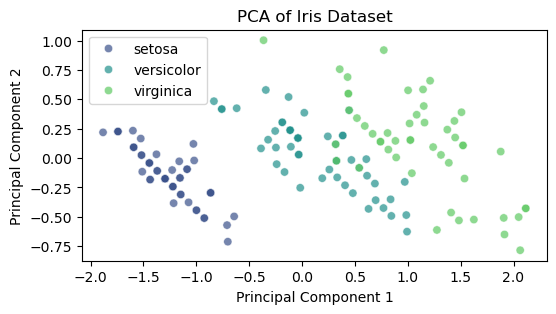

In [572]:
# Concatenate the species and sepal width for coloring
final_df = pd.concat([principal_df, iris[['species']]], axis=1)

# Plotting
plt.figure(figsize=(6, 3))
sns.scatterplot(
    x='principal_component_1', y='principal_component_2',
    hue='species',
    palette='viridis', data=final_df, alpha=0.7
)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## From scratch

In [252]:
df = pd.DataFrame({
    'x': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
    'y': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
})

df_center_scaled = df - df.mean()
df_center_scaled.head()

,x,y
0,0.69,0.49
1,-1.31,-1.21
2,0.39,0.99
3,0.09,0.29
4,1.29,1.09


In [567]:
# Standardize the features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = iris.loc[:, features]

df_center_scaled = (df - df.mean()) / df.std(ddof=0)
df_center_scaled.head()

,sepal_length,petal_width
0,-0.900681,-1.315444
1,-1.143017,-1.315444
2,-1.385353,-1.315444
3,-1.506521,-1.315444
4,-1.021849,-1.315444


In [194]:
df_covariance = np.cov(df_center_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(df_covariance)

In [195]:
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of eigenvalues in descending order
eigenvalues = eigenvalues[sorted_indices]       # Sort eigenvalues
eigenvectors = eigenvectors[:, sorted_indices]

In [248]:
_, eigenvectors = svd_flip(eigenvectors.T, eigenvectors.T)
eigenvectors = eigenvectors.T

In [249]:
pcs = df_center_scaled.dot(eigenvectors)
pcs

,0,1,2,3
0,-0.778628,-0.656144,1.540995,-1.401694
1,-0.594887,0.498017,1.434092,-1.480533
2,-0.878154,0.165791,1.712902,-1.405903
3,-0.813310,0.421278,1.759991,-1.311570
4,-0.903768,-0.822952,1.684439,-1.341603
...,...,...,...,...
145,0.233739,-0.192991,-1.581635,1.127951
146,0.522643,1.020168,-1.196354,0.745638
147,0.330526,-0.127964,-1.156786,0.984504
148,-0.263976,-0.817279,-0.904513,1.491079


(-2.0, 2.0)

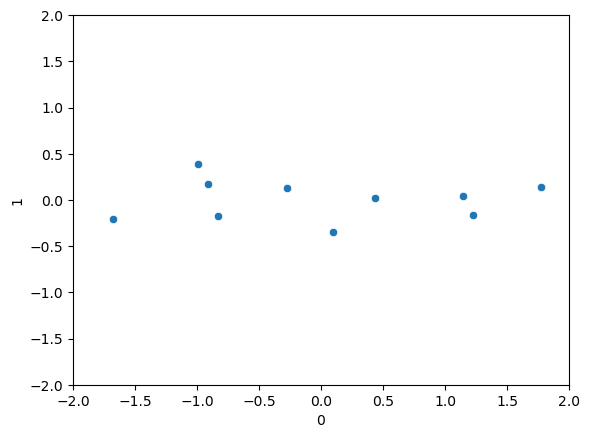

In [197]:
sns.scatterplot(data= pcs, x=0, y=1,)
plt.xlim(-2,2)
plt.ylim(-2,2)

In [60]:
principal_components.shape

(150, 2)

In [61]:
df_mean_scaled.shape

(10, 2)

----

In [317]:
# Standardize the features
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df = iris.loc[:, features]

df_standardized = (df - df.mean()) / df.std(ddof=0)
df_standardized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [318]:
df_covariance = np.cov(df_standardized.T)
eigenvalues, eigenvectors = np.linalg.eig(df_covariance)
eigenvalues, eigenvectors

(array([2.93808505, 0.9201649 , 0.14774182, 0.02085386]),
 array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
        [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
        [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
        [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]]))

In [319]:
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of eigenvalues in descending order
eigenvalues = eigenvalues[sorted_indices]       # Sort eigenvalues
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [321]:
pcs = df_standardized.dot(eigenvectors)
pcs = pd.DataFrame(pcs)  
pcs['species'] = iris['species']

(-3.0, 3.5)

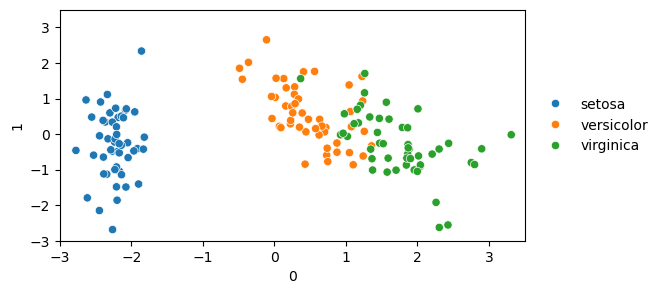

In [322]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data= pcs, x=0, y=1,hue='species')
plt.legend(bbox_to_anchor=(1.15,0.5),loc='center',frameon=False)
plt.xlim(-3,3.5)
plt.ylim(-3,3.5)

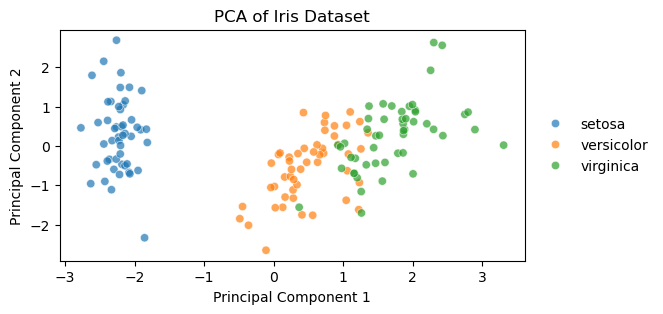

In [530]:
# Concatenate the species and sepal width for coloring
final_df = pd.concat([principal_df, iris[['species']]], axis=1)

# Plotting
plt.figure(figsize=(6, 3))
sns.scatterplot(
    x='principal_component_1', y='principal_component_2',
    hue='species',
    data=final_df, alpha=0.7
)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.15,0.5),loc='center',frameon=False)
plt.show()

The sign is different but the values are the same. This does not affect the results

### Eigenvalues are a measure of variance

In [ ]:
np.isclose(pca.explained_variance_ , eigenvalues)

In [ ]:
np.isclose(pca.explained_variance_ratio_ ,  eigenvalues / eigenvalues.sum() )

In [364]:
from scipy.sparse.linalg import svds
from sklearn.utils.extmath import svd_flip

In [365]:
U, S, Vt = svds(np.array(df_standardized), k=3)
S = S[::-1]
# flip eigenvectors' sign to enforce deterministic output
U, Vt = svd_flip(U[:, ::-1], Vt[::-1], u_based_decision=False)

In [369]:
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [371]:
(S**2)/(150-1)

array([2.93808505, 0.9201649 , 0.14774182])

-------

In [521]:
# Standardize the features
features = ['sepal_length', 'petal_width']
df = iris.loc[:, features]

df_standardized = (df - df.mean()) / df.std(ddof=0)
df_standardized.head()

,sepal_length,petal_width
0,-0.900681,-1.315444
1,-1.143017,-1.315444
2,-1.385353,-1.315444
3,-1.506521,-1.315444
4,-1.021849,-1.315444


In [522]:
pca = PCA()
pca.fit(df_standardized)
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [523]:
df_covariance = np.cov(df_standardized.T)
eigenvalues, eigenvectors = np.linalg.eig(df_covariance)
eigenvalues, eigenvectors

(array([1.83014207, 0.18328075]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

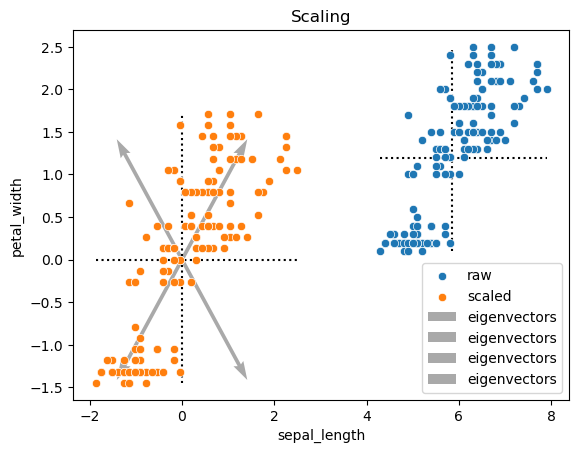

In [428]:
plt.title('Scaling')
sns.scatterplot(data=df,x='sepal_length',y='petal_width', label='raw')

plt.vlines(df['sepal_length'].mean(),df['petal_width'].min(),df['petal_width'].max(),color='black',ls=':',zorder=-1)
plt.hlines(df['petal_width'].mean(),df['sepal_length'].min(),df['sepal_length'].max(),color='black',ls=':',zorder=-1)


sns.scatterplot(data=df_standardized,x='sepal_length',y='petal_width',label='scaled')

plt.vlines(df_standardized['sepal_length'].mean(),
           df_standardized['petal_width'].min(),  df_standardized['petal_width'].max(),color='black',ls=':',zorder=-1)

plt.hlines(df_standardized['petal_width'].mean(),
           df_standardized['sepal_length'].min(), df_standardized['sepal_length'].max(),color='black',ls=':',zorder=-1)


# Overlay the eigenvectors
origin = np.mean(df_standardized, axis=0)
for vector in eigenvectors:
    plt.quiver(*origin, *vector, scale=0.5, lw=0.5, color='darkgray', angles='xy', scale_units='xy', label='eigenvectors',zorder=-2,ls=':')
    plt.quiver(*origin, *vector*-1, scale=0.5, lw=0.5, color='darkgray', angles='xy', scale_units='xy', label='eigenvectors',zorder=-2,ls=':')



plt.legend()
plt.show()
# sns.scatterplot(data=df_standardized,x='sepal_length',y='petal_width')
# plt.vlines(0,-1.9,1.9,color='black',ls=':',zorder=-1)
# plt.hlines(0,-1.9,1.9,color='black',ls=':',zorder=-1)

In [432]:
mean = df_standardized.mean().values
mean

array([-4.73695157e-16, -4.73695157e-16])

In [484]:
eigenvectors = eigenvectors[::-1]
eigenvectors

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [527]:
first_pc = eigenvectors[0]
first_pc

array([ 0.70710678, -0.70710678])

In [ ]:
# Function to calculate the distance to the first principal component
def distance_to_first_pc(point, mean, first_pc):
    # Project the point onto the first principal component
    projection = np.dot(point - mean, first_pc) * first_pc + mean
    # Calculate the distance between the original point and the projection
    distance = np.linalg.norm(point - projection)
    return distance

In [528]:
distances = df_standardized.apply(lambda row: distance_to_first_pc(row.values, mean, first_pc), axis=1)
distances

0      1.567037
1      1.738395
2      1.909752
3      1.995430
4      1.652716
         ...   
145    1.758459
146    1.043432
147    1.307868
148    1.330066
149    0.607640
Length: 150, dtype: float64

In [529]:
np.sum(distances**2)/149

1.830142073427761

In [477]:
first_pc = eigenvectors[0]
t = np.linspace(-3, 3, 100)
pc1_line = mean + t[:, np.newaxis] * first_pc

In [478]:
def project_point_onto_pc(point, mean, pc):
    projection_length = np.dot(point - mean, pc)
    projection = mean + projection_length * pc
    return projection, projection_length

In [479]:
df_standardized.head(1).apply(tuple,1)

0    (-0.9006811702978088, -1.3154442950077403)
dtype: object

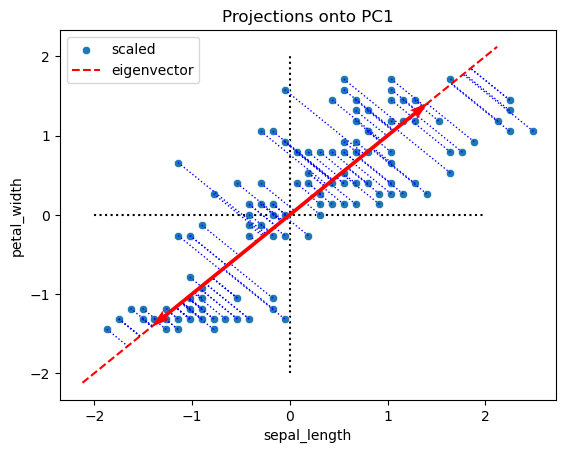

In [516]:
plt.title('Projections onto PC1')

sns.scatterplot(data=df_standardized,x='sepal_length',y='petal_width',label='scaled')
plt.plot(pc1_line[:, 0], pc1_line[:, 1], color='red', linestyle='--', label='eigenvector')

plt.vlines(0,
           -2,2,color='black',ls=':',zorder=-1)

plt.hlines(0,
           -2,2,color='black',ls=':',zorder=-1)


for vector in eigenvectors[0:1]:
    plt.quiver(*origin, *vector, scale=0.5, lw=0.05, color='red', angles='xy', scale_units='xy', zorder=10,ls=':')
    plt.quiver(*origin, *vector*-1, scale=0.5, lw=0.05, color='red', angles='xy', scale_units='xy', zorder=10,ls=':')


distances_to_origin = []
for i in range(len(df_standardized)):
    point = df_standardized.iloc[i].values
    projection, projection_length = project_point_onto_pc(point, 0, first_pc)
    plt.plot([point[0], projection[0]], [point[1], projection[1]], color='blue', linestyle=':', lw=1)
    distances_to_origin.append(np.linalg.norm(projection))

plt.legend()

In [481]:
np.sum([_**2 for _ in distances_to_origin])/149

1.830142073427761

In [483]:
eigenvalues[0]

1.830142073427761

__Rotate__

In [564]:
pc_projections = np.dot(df_standardized, eigenvectors)
pc_projections = pd.DataFrame(pc_projections,columns=['sepal_length_projected','petal_width_projected'])

plt.figure(figsize=(6, 3))
plt.title('Projections onto PC1')
sns.scatterplot(data=pc_projections,x='sepal_length_projected',y='petal_width_projected',label='projected')

<Axes: title={'center': 'Projections onto PC1'}, xlabel='sepal_length_projected', ylabel='petal_width_projected'>

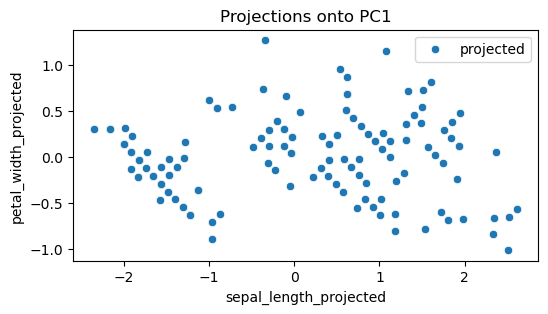

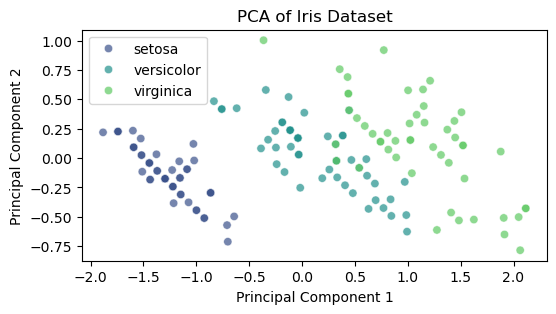

In [573]:
# Concatenate the species and sepal width for coloring
final_df = pd.concat([principal_df, iris[['species']]], axis=1)

# Plotting
plt.figure(figsize=(6, 3))
sns.scatterplot(
    x='principal_component_1', y='principal_component_2',
    hue='species',
    palette='viridis', data=final_df, alpha=0.7
)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()